In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'samples.xlsx'  # Change this to your file path
data = pd.read_excel(file_path)

# Function to convert the row in .xlsx to a NumPy array
def convert(row_index):
    temp_row_series = data.iloc[row_index].iloc[1:]
    return temp_row_series


# Rich countries
Income vs happiness

In [8]:
happiness = []
income = []

no_countries = 7

for i in range(no_countries):
    happiness.append(convert(i).to_numpy())

for i in range(no_countries+1,no_countries*2+1):
    income.append(convert(i).to_numpy())

# print(len(happiness), len(income))

In [ ]:
## Data processing to create line of best fit


# Combines all the INCOME into one array and the HAPPINESS into another array
INC_combined_RICH = np.concatenate(income)
HAP_combined_RICH  = np.concatenate(happiness)

# Ensures all values are numeric by converting all to None to NaN
INC_combined_RICH = pd.to_numeric(INC_combined_RICH, errors='coerce')
HAP_combined_RICH = pd.to_numeric(HAP_combined_RICH , errors='coerce')

# The mask will filter out all combos of INCOME and HAPPINESS (x,y) where at least one is NaN
mask = ~np.isnan(INC_combined_RICH) & ~np.isnan(HAP_combined_RICH) # Only returns true if both are numbers (due to & operator)
INC_combined_RICH = INC_combined_RICH[mask]
HAP_combined_RICH = HAP_combined_RICH [mask]

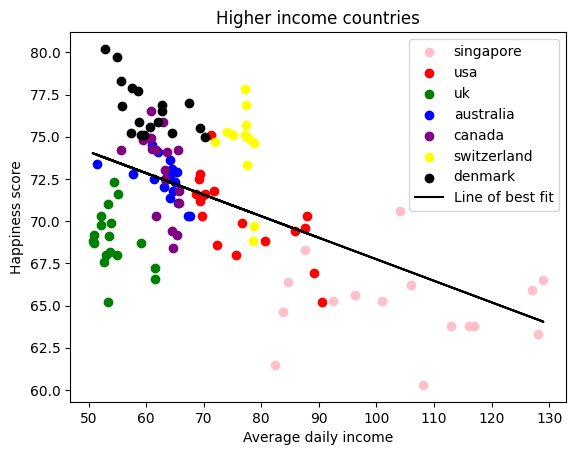

R-value: -0.5405717163948515


In [10]:

countries = ['singapore','usa','uk','australia','canada','switzerland','denmark']
colours = ['pink','red','green','blue','purple','yellow','black']

for i in range(7):
    plt.scatter(income[i],happiness[i],c=colours[i],label=countries[i])

slope, intercept = np.polyfit(INC_combined_RICH, HAP_combined_RICH, 1)    # Calculates the slope and y int for LOBF
line_y = slope * INC_combined_RICH + intercept                     # Plugging into y = mx + c!
plt.plot(INC_combined_RICH, line_y, color='black', label='Line of best fit')

plt.title('Higher income countries')
plt.xlabel('Average daily income')
plt.ylabel('Happiness score')
plt.legend()
plt.show()

r_value = np.corrcoef(INC_combined_RICH, HAP_combined_RICH)[0, 1]     # Function in numpy that calculates the R-value
print("R-value:", r_value)